This script tries to apply Fraud Detection Classification in binary way. The used dataset is the one below:

https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023

An accuracy of 94% is reached using four layers Fully Connected Neural Network

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import csv
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
ds_features = []
class_list = []
with open('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    skip_labels = next(reader) #skip first line
    for row in reader:
        tmp_row = [float(item) for item in row[:-1]]
        ds_features.append(tmp_row[1:])
        class_list.append(float(row[-1]))

In [3]:
#making list numpy array
ds_features = np.array(ds_features).astype('float64')
class_list = np.array(class_list)

In [4]:
#features regularization, remove mean, reshape with std_dev
#and rescale (normalization) by highest feature value
for index in range(len(ds_features[0])):
    ds_features[:,index] -= ds_features[:,index].mean()
    ds_features[:,index] /= ds_features[:,index].std()
    ds_features[:,index] /= max(ds_features[:,index])

In [5]:
#SPLIT in training and validation sets
X, Y = shuffle(ds_features, class_list)
split_ratio = 0.985
X_train, Y_train = X[:int(split_ratio*X.shape[0])], Y[:int(split_ratio*Y.shape[0])]
X_valid, Y_valid = X[int(split_ratio*X.shape[0]):], Y[int(split_ratio*Y.shape[0]):]

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)

(560100, 29)
(560100,)
(8530, 29)
(8530,)


In [7]:
#model definition
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(5, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(5, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal')])

In [8]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9),
    metrics=['accuracy'])

In [9]:
class EarlyStop(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') is not None and logs.get('accuracy') > 0.94 and logs.get('val_accuracy')  > 0.94:                 
            print("\nReached wanted accuracy so cancelling training!")
            self.model.stop_training = True
early_stop_cb = EarlyStop()

In [10]:
epochs = 100
history = model.fit(
            X_train, Y_train,
            epochs=epochs,
            validation_data=(X_valid, Y_valid),
            verbose=1,
            callbacks=[early_stop_cb])

Epoch 1/100
17504/17504 [==============================] - 68s 4ms/step - loss: 0.6713 - accuracy: 0.7004 - val_loss: 0.6559 - val_accuracy: 0.7679
Epoch 2/100
17504/17504 [==============================] - 61s 4ms/step - loss: 0.6321 - accuracy: 0.7962 - val_loss: 0.6041 - val_accuracy: 0.8233
Epoch 3/100
17504/17504 [==============================] - 61s 4ms/step - loss: 0.5665 - accuracy: 0.8422 - val_loss: 0.5238 - val_accuracy: 0.8634
Epoch 4/100
17504/17504 [==============================] - 62s 4ms/step - loss: 0.4720 - accuracy: 0.8734 - val_loss: 0.4192 - val_accuracy: 0.8839
Epoch 5/100
17504/17504 [==============================] - 65s 4ms/step - loss: 0.3728 - accuracy: 0.8864 - val_loss: 0.3294 - val_accuracy: 0.8910
Epoch 6/100
17504/17504 [==============================] - 64s 4ms/step - loss: 0.2997 - accuracy: 0.8962 - val_loss: 0.2709 - val_accuracy: 0.9040
Epoch 7/100
17504/17504 [==============================] - 63s 4ms/step - loss: 0.2538 - accuracy: 0.9096 - val_

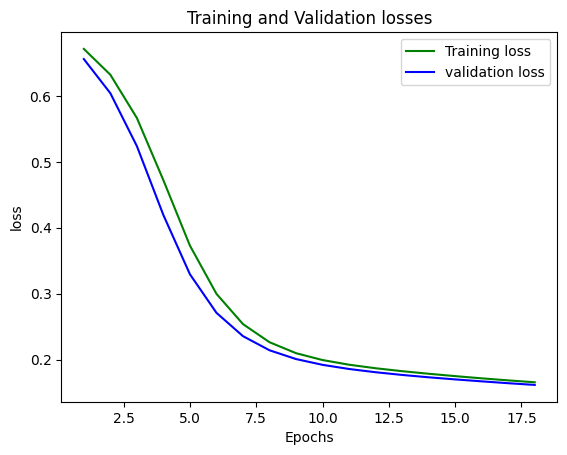

In [11]:
epoch_range = np.arange(1, history.epoch[-1]+2)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epoch_range, train_loss, 'g', label='Training loss')
plt.plot(epoch_range, val_loss, 'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

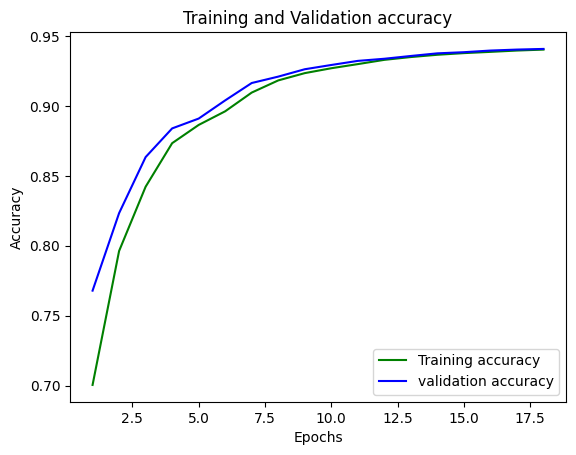

In [12]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epoch_range, train_accuracy, 'g', label='Training accuracy')
plt.plot(epoch_range, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()